In [2]:
from keras.models import Model
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.layers import Dense, Flatten, Reshape, Input, AveragePooling2D, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization,RepeatVector, LSTM
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
def base_model_Autoencoder(level = 2, input_size=(28,28,1), kernel_list=[32,64]):

  img_input = Input(input_size)

  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(img_input)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D()(x)

  for i in range(level-1):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
  x1 = x
  print(x1.shape)

  for i in range(level-1) :
    k = -(level-1)+i  

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
     
    x = Conv2D(kernel_list[k], (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

  x = Conv2DTranspose(kernel_list[0], (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  model = Model(img_input, x)
   
  modelviz0=Model(img_input, x1)
  model.compile(optimizer=Adam(),
                  loss='mean_squared_error',
                  metrics=['accuracy'])

  return model, modelviz0

In [0]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

noice = 0.1 #возьмем коэффициэнт зашумленности 0.1

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

yTrainMnist_pix = xTrainMnist.copy()
xTrainMnist += np.random.randn(xTrainMnist.shape[0],xTrainMnist.shape[1],xTrainMnist.shape[2],xTrainMnist.shape[3]) * noice

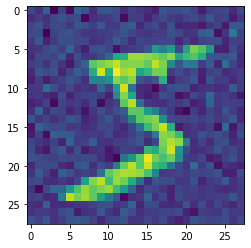

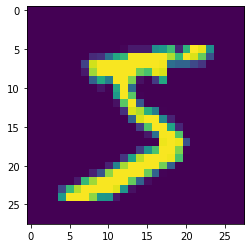

In [13]:
plt.imshow(xTrainMnist[0,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[0,:,:,0])
plt.show()

In [14]:
modelAutoMnist, m0 = base_model_Autoencoder(level = 2, input_size=(28,28,1), kernel_list=[32,64])

(?, 7, 7, 64)


In [15]:

#modelAutoMnist = denoiseAutoencoder()
hist=modelAutoMnist.fit(xTrainMnist[:10000], yTrainMnist_pix[:10000], epochs=10, batch_size=100, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 4s 550us/step - loss: 0.0422 - acc: 0.7871 - val_loss: 0.0108 - val_acc: 0.8133
Epoch 2/10
8000/8000 [==============================] - 2s 288us/step - loss: 0.0079 - acc: 0.8145 - val_loss: 0.0065 - val_acc: 0.8141
Epoch 3/10
8000/8000 [==============================] - 2s 290us/step - loss: 0.0056 - acc: 0.8148 - val_loss: 0.0053 - val_acc: 0.8141
Epoch 4/10
8000/8000 [==============================] - 2s 288us/step - loss: 0.0044 - acc: 0.8148 - val_loss: 0.0046 - val_acc: 0.8142
Epoch 5/10
8000/8000 [==============================] - 2s 291us/step - loss: 0.0037 - acc: 0.8148 - val_loss: 0.0042 - val_acc: 0.8142
Epoch 6/10
8000/8000 [==============================] - 2s 296us/step - loss: 0.0034 - acc: 0.8149 - val_loss: 0.0035 - val_acc: 0.8143
Epoch 7/10
8000/8000 [==============================] - 2s 291us/step - loss: 0.0031 - acc: 0.8149 - val_loss: 0.0033 - val_acc: 0.8143


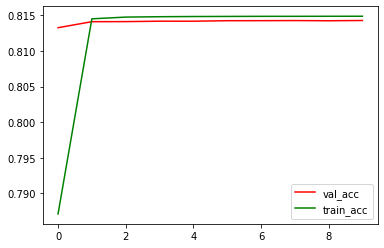

In [16]:
plt.plot(hist.history['val_acc'],'r',label='val_acc')
plt.plot(hist.history['acc'],'g',label='train_acc')
plt.legend()
plt.show()

In [17]:
modelAutoMnist.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        1849

In [18]:
mask = np.where(yTrainMnist == 0)

y_pred=modelAutoMnist.predict(xTrainMnist[mask[0]])

ff=m0.predict(xTrainMnist[mask[0]])
print(ff.shape)

ff = np.mean(ff, axis=0)
print(ff.shape)

(5923, 7, 7, 64)
(7, 7, 64)


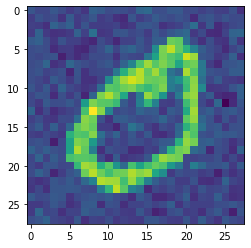

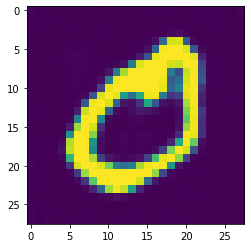

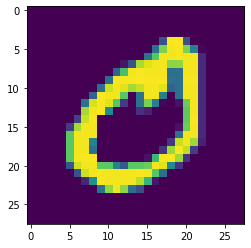

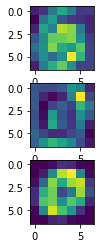

In [19]:
plt.imshow(xTrainMnist[mask[0]][1,:,:,0])
plt.show()
plt.imshow(y_pred[1,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[mask[0]][1,:,:,0])
plt.show()

g1=ff[:,:,0]
plt.subplot(311)
plt.imshow(g1)
g1=ff[:,:,1]
plt.subplot(312)
plt.imshow(g1)
g1=ff[:,:,2]
plt.subplot(313)
plt.imshow(g1)
plt.show()

In [0]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

noice = 0.4 #возьмем коэффициэнт зашумленности 0.1

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

yTrainMnist_pix = xTrainMnist.copy()
xTrainMnist += np.random.randn(xTrainMnist.shape[0],xTrainMnist.shape[1],xTrainMnist.shape[2],xTrainMnist.shape[3]) * noice

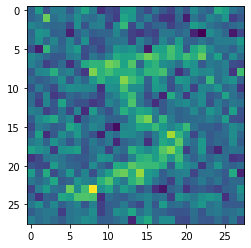

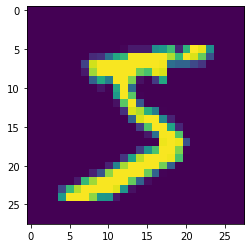

In [22]:
plt.imshow(xTrainMnist[0,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[0,:,:,0])
plt.show()

In [23]:

#modelAutoMnist = denoiseAutoencoder()
hist=modelAutoMnist.fit(xTrainMnist[:10000], yTrainMnist_pix[:10000], epochs=10, batch_size=100, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 293us/step - loss: 0.0089 - acc: 0.8138 - val_loss: 0.0097 - val_acc: 0.8121
Epoch 2/10
8000/8000 [==============================] - 2s 288us/step - loss: 0.0079 - acc: 0.8140 - val_loss: 0.0079 - val_acc: 0.8134
Epoch 3/10
8000/8000 [==============================] - 2s 289us/step - loss: 0.0075 - acc: 0.8141 - val_loss: 0.0075 - val_acc: 0.8134
Epoch 4/10
8000/8000 [==============================] - 2s 291us/step - loss: 0.0073 - acc: 0.8142 - val_loss: 0.0075 - val_acc: 0.8135
Epoch 5/10
8000/8000 [==============================] - 2s 292us/step - loss: 0.0070 - acc: 0.8142 - val_loss: 0.0074 - val_acc: 0.8136
Epoch 6/10
8000/8000 [==============================] - 2s 285us/step - loss: 0.0069 - acc: 0.8142 - val_loss: 0.0073 - val_acc: 0.8135
Epoch 7/10
8000/8000 [==============================] - 2s 284us/step - loss: 0.0067 - acc: 0.8143 - val_loss: 0.0074 - val_acc: 0.8134


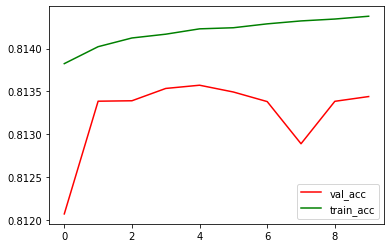

In [24]:
plt.plot(hist.history['val_acc'],'r',label='val_acc')
plt.plot(hist.history['acc'],'g',label='train_acc')
plt.legend()
plt.show()

In [0]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

noice = 0.9 #возьмем коэффициэнт зашумленности 0.1

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

yTrainMnist_pix = xTrainMnist.copy()
xTrainMnist += np.random.randn(xTrainMnist.shape[0],xTrainMnist.shape[1],xTrainMnist.shape[2],xTrainMnist.shape[3]) * noice

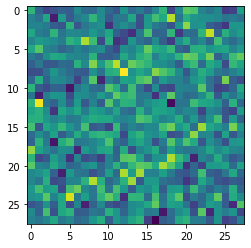

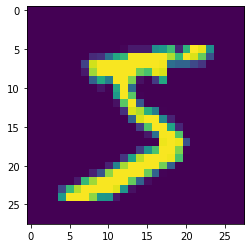

In [26]:
plt.imshow(xTrainMnist[0,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[0,:,:,0])
plt.show()

In [27]:

#modelAutoMnist = denoiseAutoencoder()
hist=modelAutoMnist.fit(xTrainMnist[:10000], yTrainMnist_pix[:10000], epochs=10, batch_size=100, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 298us/step - loss: 0.0266 - acc: 0.8059 - val_loss: 0.0407 - val_acc: 0.7803
Epoch 2/10
8000/8000 [==============================] - 2s 288us/step - loss: 0.0240 - acc: 0.8072 - val_loss: 0.0271 - val_acc: 0.8006
Epoch 3/10
8000/8000 [==============================] - 2s 291us/step - loss: 0.0231 - acc: 0.8077 - val_loss: 0.0250 - val_acc: 0.8040
Epoch 4/10
8000/8000 [==============================] - 2s 292us/step - loss: 0.0222 - acc: 0.8080 - val_loss: 0.0243 - val_acc: 0.8071
Epoch 5/10
8000/8000 [==============================] - 2s 292us/step - loss: 0.0216 - acc: 0.8083 - val_loss: 0.0242 - val_acc: 0.8069
Epoch 6/10
8000/8000 [==============================] - 2s 289us/step - loss: 0.0212 - acc: 0.8085 - val_loss: 0.0253 - val_acc: 0.8053
Epoch 7/10
8000/8000 [==============================] - 2s 289us/step - loss: 0.0211 - acc: 0.8085 - val_loss: 0.0244 - val_acc: 0.8067


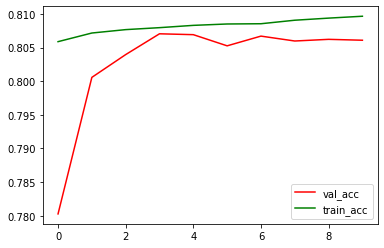

In [28]:
plt.plot(hist.history['val_acc'],'r',label='val_acc')
plt.plot(hist.history['acc'],'g',label='train_acc')
plt.legend()
plt.show()

Вывод: при увеличении зашумленности точность немного падает.
При noise = 0.1: train_acc = 0.815; val_acc = 0.814.
При noise = 0.4: train_acc = 0.814; val_acc = 0.8135.
При noise = 0.9: train_acc = 0.807; val_acc = 0.806.
